# 대한민국 경제지표

## 일별 데이터

In [ ]:
# http://localhost:8888/notebooks/%EC%9D%91%EC%9A%A9%EC%9E%90%EB%A3%8C%EB%B6%84%EC%84%9D/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%8F%AC%ED%84%B8%2C%20ecos%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb

In [ ]:
# 일별 국내: 국고채(3년), 국고채(10년), 기준금리, 코스피, 코스닥
# 일별 해외: 다우존스, 나스닥, S&P, 국고채(2년), 국고채(10년), 금, 은, 해외지수(항셍, 니프티 등등), 원달러 환율
# 월별 국내: 실업률, 고용률, CPI, PPI, 경상수지, 주택가격지수
# 분기별 국내: 경제성장률

In [1]:
import json
import requests
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
def daily_domestic(api_key, start, end, code_lst, freq, code_dict):
    
    dataset = pd.DataFrame(index = pd.date_range(start, end))
        
    dataset.index.name = "time"
    for code in code_lst:
        url = f"http://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/10000/{code[0]}/{freq}/{start}/{end}/{code[1]}"
        r = requests.get(url)
        jo = json.loads(r.text)
        result = pd.json_normalize(jo['StatisticSearch']['row'])
        data_name = pd.unique(result["ITEM_NAME1"])[0]

        df = result[["TIME", "DATA_VALUE"]]
        df = df.rename(columns = {"TIME": "time", "DATA_VALUE": data_name})
        df[data_name] = pd.to_numeric(df[data_name])
        df["time"] = pd.to_datetime(df["time"])
        df = df.set_index("time")
        df = df.rename(columns=code_dict)
        dataset = dataset.join(df, how="left")
        
    dataset = dataset.reset_index()
    dataset["time"] = dataset["time"].dt.date
    
    return dataset

In [3]:
# 일별 데이터
api_key = "CPQS2N3O5QZJ6PWRX8OF"
start = (datetime.today() - relativedelta(years=10)).strftime("%Y%m%d")
end = datetime.today().strftime("%Y%m%d")
code_lst = [
    ("817Y002", "010200000"), ("817Y002", "010210000"), ("722Y001", "0101000"), ("802Y001", "0001000"), ("802Y001", "0089000"),
    ("731Y001", "0000001")
]  # 국고채(3년), 국고채(10년), 기준금리, KOSPI, KOSDAQ, 원/달러 환율
freq = "D" # 일별
code_dict = {"국고채(3년)": "kr_bond_3y", "국고채(10년)": "kr_bond_10y",
             "한국은행 기준금리": "kr_base_rate", "KOSPI지수": "kospi",
             "KOSDAQ지수": "kosdaq", "원/미국달러(매매기준율)": "usd_krw"}

dataset_daily = daily_domestic(api_key, start, end, code_lst, freq, code_dict)
dataset_daily

,time,kr_bond_3y,kr_bond_10y,kr_base_rate,kospi,kosdaq,usd_krw
0,2015-03-25,1.785,2.171,1.75,2042.81,651.05,1107.1
1,2015-03-26,1.779,2.178,1.75,2022.56,642.53,1102.7
2,2015-03-27,1.770,2.180,1.75,2019.80,640.12,1104.2
3,2015-03-28,NaN,NaN,1.75,NaN,NaN,NaN
4,2015-03-29,NaN,NaN,1.75,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3649,2025-03-21,2.597,2.805,2.75,2643.13,719.41,1459.2
3650,2025-03-22,NaN,NaN,2.75,NaN,NaN,NaN
3651,2025-03-23,NaN,NaN,NaN,NaN,NaN,NaN
3652,2025-03-24,2.604,2.816,NaN,2632.07,720.22,1466.9


In [16]:
dataset_daily["time"] = dataset_daily["time"].astype(str)
dataset_daily

,time,kr_bond_3y,kr_bond_10y,kr_base_rate,kospi,kosdaq,usd_krw
0,2015-03-25,1.785,2.171,1.75,2042.81,651.05,1107.1
1,2015-03-26,1.779,2.178,1.75,2022.56,642.53,1102.7
2,2015-03-27,1.770,2.180,1.75,2019.80,640.12,1104.2
3,2015-03-28,NaN,NaN,1.75,NaN,NaN,NaN
4,2015-03-29,NaN,NaN,1.75,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3649,2025-03-21,2.597,2.805,2.75,2643.13,719.41,1459.2
3650,2025-03-22,NaN,NaN,2.75,NaN,NaN,NaN
3651,2025-03-23,NaN,NaN,NaN,NaN,NaN,NaN
3652,2025-03-24,2.604,2.816,NaN,2632.07,720.22,1466.9


In [17]:
data_to_store = dataset_daily.to_dict(orient="records")
data_to_store = [{k: (None if pd.isna(v) else v) for k, v in data_dict.items()} for data_dict in data_to_store]
data_to_store

[{'time': '2015-03-25',
  'kr_bond_3y': 1.785,
  'kr_bond_10y': 2.171,
  'kr_base_rate': 1.75,
  'kospi': 2042.81,
  'kosdaq': 651.05,
  'usd_krw': 1107.1},
 {'time': '2015-03-26',
  'kr_bond_3y': 1.779,
  'kr_bond_10y': 2.178,
  'kr_base_rate': 1.75,
  'kospi': 2022.56,
  'kosdaq': 642.53,
  'usd_krw': 1102.7},
 {'time': '2015-03-27',
  'kr_bond_3y': 1.77,
  'kr_bond_10y': 2.18,
  'kr_base_rate': 1.75,
  'kospi': 2019.8,
  'kosdaq': 640.12,
  'usd_krw': 1104.2},
 {'time': '2015-03-28',
  'kr_bond_3y': None,
  'kr_bond_10y': None,
  'kr_base_rate': 1.75,
  'kospi': None,
  'kosdaq': None,
  'usd_krw': None},
 {'time': '2015-03-29',
  'kr_bond_3y': None,
  'kr_bond_10y': None,
  'kr_base_rate': 1.75,
  'kospi': None,
  'kosdaq': None,
  'usd_krw': None},
 {'time': '2015-03-30',
  'kr_bond_3y': 1.748,
  'kr_bond_10y': 2.152,
  'kr_base_rate': 1.75,
  'kospi': 2030.04,
  'kosdaq': 646.74,
  'usd_krw': 1104.3},
 {'time': '2015-03-31',
  'kr_bond_3y': 1.721,
  'kr_bond_10y': 2.16,
  'kr_bas

## 월별 데이터

In [12]:
def monthly_domestic(api_key, start, end, code_lst, freq):
    
    dataset = pd.DataFrame(index = pd.date_range(start+"01", end+"01", freq="MS").strftime("%Y%m"))
    dataset.index.name = "time"
    dataset.index = pd.to_datetime(dataset.index, format='%Y%m').to_period('M')
    
    for code in code_lst:
        url = f"http://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/10000/{code[0]}/{freq}/{start}/{end}/{code[1]}"
        r = requests.get(url)
        jo = json.loads(r.text)
        result = pd.json_normalize(jo['StatisticSearch']['row'])
        if code[0] in ("901Y009", "404Y014", "901Y093", "901Y094", "901Y095", "901Y089"):
            data_name = pd.unique(result["STAT_NAME"])[0]
        else:
            data_name = pd.unique(result["ITEM_NAME1"])[0]

        df = result[["TIME", "DATA_VALUE"]]
        df = df.rename(columns = {"TIME": "time", "DATA_VALUE": data_name})
        df[data_name] = pd.to_numeric(df[data_name])
        df['time'] = pd.to_datetime(df['time'], format='%Y%m').dt.to_period('M')
        df = df.set_index("time")
        dataset = dataset.join(df, how="left")
    
    return dataset

In [13]:
# 월별 데이터
api_key = "CPQS2N3O5QZJ6PWRX8OF"
start = (datetime.today() - relativedelta(years=10)).strftime("%Y%m")
end = datetime.today().strftime("%Y%m")
code_lst = [
    ("901Y027", "I61BC/I28B"), ("901Y027", "I61E/I28B"), ("901Y009", "0"), ("404Y014", "*AA"), ("301Y017", "SA000"), 
    ("901Y093", "H69A/R70A"), ("901Y094", "H69A/R70A"), ("901Y095", "H69A/R70A"), ("901Y089", "100")
]  # 실업률, 고용률, CPI, PPI
freq = "M" # 월별

dataset_monthly = monthly_domestic(api_key, start, end, code_lst, freq)
dataset_monthly

,실업률,고용률,4.2.1. 소비자물가지수,4.1.1.1. 생산자물가지수(기본분류),경상수지,4.4.3.1. 유형별 주택매매가격지수,4.4.3.2. 유형별 주택전세가격지수,4.4.3.3. 유형별 주택월세통합가격지수,4.4.4. 아파트 매매 실거래가격지수
time,,,,,,,,,
2015-03,3.5,60.4,94.596,97.87,8816.7,85.3,90.3,NaN,92.0
2015-04,3.6,60.4,94.625,97.84,9316.4,85.7,90.8,NaN,92.7
2015-05,3.7,60.4,94.890,97.90,6497.2,86.0,91.2,NaN,93.3
2015-06,3.8,60.3,94.909,97.85,10000.0,86.3,91.7,100.1,93.8
2015-07,3.7,60.5,95.080,97.50,8858.7,86.5,92.0,100.1,94.7
...,...,...,...,...,...,...,...,...,...
2024-11,2.7,62.6,114.400,119.10,9594.8,96.4,93.7,102.8,124.7
2024-12,3.7,62.3,114.910,119.52,9608.5,96.3,93.7,102.9,124.2
2025-01,2.9,62.9,115.710,120.18,10079.7,96.2,93.7,103.0,NaN


## 테스트 코드

In [215]:
import json
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd

api_key = "CPQS2N3O5QZJ6PWRX8OF"
start = (datetime.today() - relativedelta(years=10)).strftime("%Y%m")
end = datetime.today().strftime("%Y%m")
statcode = "901Y093"
freq = "M" 
itemcode = "H69A"

url = f'http://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/10000/{statcode}/{freq}/{start}/{end}/{itemcode}'
r = requests.get(url)
jo = json.loads(r.text)

In [217]:
result = pd.json_normalize(jo['StatisticSearch']['row'])
result = result[["TIME", "DATA_VALUE"]]
result

,TIME,DATA_VALUE
0,201503,85.3
1,201503,79.2
2,201503,91.3
3,201503,83.2
4,201503,97.7
...,...,...
2851,202501,100.3
2852,202501,96.3
2853,202501,99.8
2854,202501,91


# 해외 경제지표

In [ ]:
# http://localhost:8888/notebooks/%EC%9D%91%EC%9A%A9%EC%9E%90%EB%A3%8C%EB%B6%84%EC%84%9D/20190799_%EA%B9%80%EB%82%A8%ED%9B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb

In [20]:
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

In [21]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [22]:
my_key = "0bfe5b3fc075cca6927db86afa33f09b"
fred = Fred(api_key=my_key)

## 일별 데이터

In [255]:
def daily_overseas(api_key, start, end, code_lst):
    
    dataset = pd.DataFrame(index = pd.date_range(start, end))
        
    dataset.index.name = "time"
    for code in code_lst:
        df = fred.get_series(code, start).to_frame(code)  

        dataset = dataset.join(df, how="left")
    
    return dataset

In [256]:
start = (datetime.today() - relativedelta(years=10)).strftime("%Y%m%d")
end = datetime.today().strftime("%Y%m%d")
code_lst = ["DGS2", "DGS10", "DFEDTARU", "SP500", "NASDAQCOM", "DJIA"]

dataset = daily_overseas(api_key, start, end, code_lst)
dataset

,DGS2,DGS10,DFEDTARU,SP500,NASDAQCOM,DJIA
time,,,,,,
2015-03-19,0.63,1.98,0.25,2089.27,4992.38,17959.03
2015-03-20,0.60,1.93,0.25,2108.10,5026.42,18127.65
2015-03-21,NaN,NaN,0.25,NaN,NaN,NaN
2015-03-22,NaN,NaN,0.25,NaN,NaN,NaN
2015-03-23,0.60,1.92,0.25,2104.42,5010.97,18116.04
...,...,...,...,...,...,...
2025-03-15,NaN,NaN,4.50,NaN,NaN,NaN
2025-03-16,NaN,NaN,4.50,NaN,NaN,NaN
2025-03-17,4.06,4.31,4.50,5675.12,17808.66,41841.63


## 테스트 코드

In [236]:
# 미국채(3개월) 금리, 미국채(2년) 금리, 미국채(10년) 금리, 미국채(30년) 금리, FFR 수집

start = (datetime.today() - relativedelta(years=10)).strftime("%Y%m%d")
end = datetime.today().strftime("%Y%m%d")

DGS2 = fred.get_series('DGS2',start).to_frame("2Y")  # 2년물 미국채
DGS10 = fred.get_series('DGS10',start).to_frame("10Y")  # 10년물 미국채
FFR = fred.get_series('DFEDTARU', start).to_frame("FFR")  # 미국 기준금리(FFR)
SP500 = fred.get_series('SP500', start).to_frame("S&P500")  # S&P500
NASDAQ = fred.get_series('NASDAQCOM', start).to_frame("NASDAQ")  # 나스닥
Dow_Jones = fred.get_series('DJIA', start).to_frame("Dow Jones")  # 다우 존스

## 월별 데이터

In [ ]:
# UNRATE: 실업률, PAYEMS: 비농업고용자수, PCEPILFE: Core PCE, PCE: PCE, CPIAUCSL: CPI, PPIACO: PPI

In [39]:
def monthly_overseas(api_key, start, end, code_lst, code_dict):
    
    dataset = pd.DataFrame(index = pd.date_range(start, end, freq="MS").to_period("M"))
        
    dataset.index.name = "time"
    for code in code_lst:
        df = fred.get_series(code, start).to_frame(code)  
        df.index.name = "time"
        df.index = pd.to_datetime(df.index, format='%Y-%m').to_period('M')
        df = df.rename(columns=code_dict)

        dataset = dataset.join(df, how="left")
    
    return dataset

In [42]:
code_dict = {"UNRATE": "미국 실업률", "PAYEMS": "미국 비농업고용자수", "PCEPILFE": "미국 Core PCE", "PCE": "미국 PCE", "CPIAUCSL": "미국 CPI", "PPIACO": "미국 PPI"}

start = (datetime.today() - relativedelta(years=10)).strftime("%Y%m%d")
end = datetime.today().strftime("%Y%m%d")
code_lst = ["UNRATE", "PAYEMS", "PCEPILFE", "PCE", "CPIAUCSL", "PPIACO"]

dataset = monthly_overseas(api_key, start, end, code_lst, code_dict)
dataset

,미국 실업률,미국 비농업고용자수,미국 Core PCE,미국 PCE,미국 CPI,미국 PPI
time,,,,,,
2015-04,5.4,141196.0,96.648,12209.1,236.222,190.900
2015-05,5.6,141538.0,96.766,12275.4,237.001,193.400
2015-06,5.3,141709.0,96.882,12307.9,237.657,194.800
2015-07,5.2,141991.0,96.978,12364.9,238.034,193.900
2015-08,5.1,142125.0,97.056,12396.2,238.033,191.900
...,...,...,...,...,...,...
2024-11,4.2,158619.0,123.724,20242.7,316.449,253.196
2024-12,4.1,158942.0,123.981,20412.5,317.603,253.406
2025-01,4.0,159067.0,124.334,20381.8,319.086,257.202


In [19]:
import json
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd

start = (datetime.today() - relativedelta(years=10)).strftime("%Y%m%d")

test = fred.get_series("CPIAUCSL", start).to_frame("CPI")
test.index.name = "time"

test.index = pd.to_datetime(test.index, format='%Y%m').to_period('M')
test

,CPI
time,
2015-03,235.976
2015-04,236.222
2015-05,237.001
2015-06,237.657
2015-07,238.034
...,...
2024-10,315.564
2024-11,316.449
2024-12,317.603


In [246]:
test

,FFR
2015-03-23,11933.3
2015-03-30,11970.5
2015-04-06,12122.2
2015-04-13,12100.8
2015-04-20,12043.8
...,...
2025-01-06,21707.1
2025-01-13,21722.0
2025-01-20,21642.6
2025-01-27,21544.0


In [238]:
DGS10

,10Y
2015-03-19,1.98
2015-03-20,1.93
2015-03-23,1.92
2015-03-24,1.88
2015-03-25,1.93
...,...
2025-03-11,4.28
2025-03-12,4.32
2025-03-13,4.27
2025-03-14,4.31


In [233]:
DGS3MO

,3M
2015-03-19,0.03
2015-03-20,0.01
2015-03-23,0.03
2015-03-24,0.02
2015-03-25,0.04
...,...
2025-03-11,4.34
2025-03-12,4.35
2025-03-13,4.34
2025-03-14,4.33


In [97]:
# 채권 금리 데이터프레임 병합
from functools import reduce

df = reduce(lambda x,y: pd.merge(x, y, left_index=True, right_index=True,
                            how='inner'), [DGS3MO, DGS2, DGS10, DGS30])

In [98]:
# 채권 금리 데이터프레임과 FFR 병합 후 None 데이터는 이전값으로 채우기

df = pd.merge(df, FFR, left_index=True, right_index=True, how="right")
df = df.ffill()
df

,3M,2Y,10Y,30Y,FFR
1982-09-27,7.83,11.69,11.99,11.82,10.25
1982-09-28,7.72,11.42,11.85,11.76,10.25
1982-09-29,7.84,11.38,11.80,11.79,10.25
1982-09-30,7.88,11.23,11.73,11.79,10.25
1982-10-01,7.60,11.13,11.51,11.65,10.00
...,...,...,...,...,...
2025-03-13,4.34,3.94,4.27,4.59,4.50
2025-03-14,4.33,4.02,4.31,4.62,4.50
2025-03-15,4.33,4.02,4.31,4.62,4.50
2025-03-16,4.33,4.02,4.31,4.62,4.50


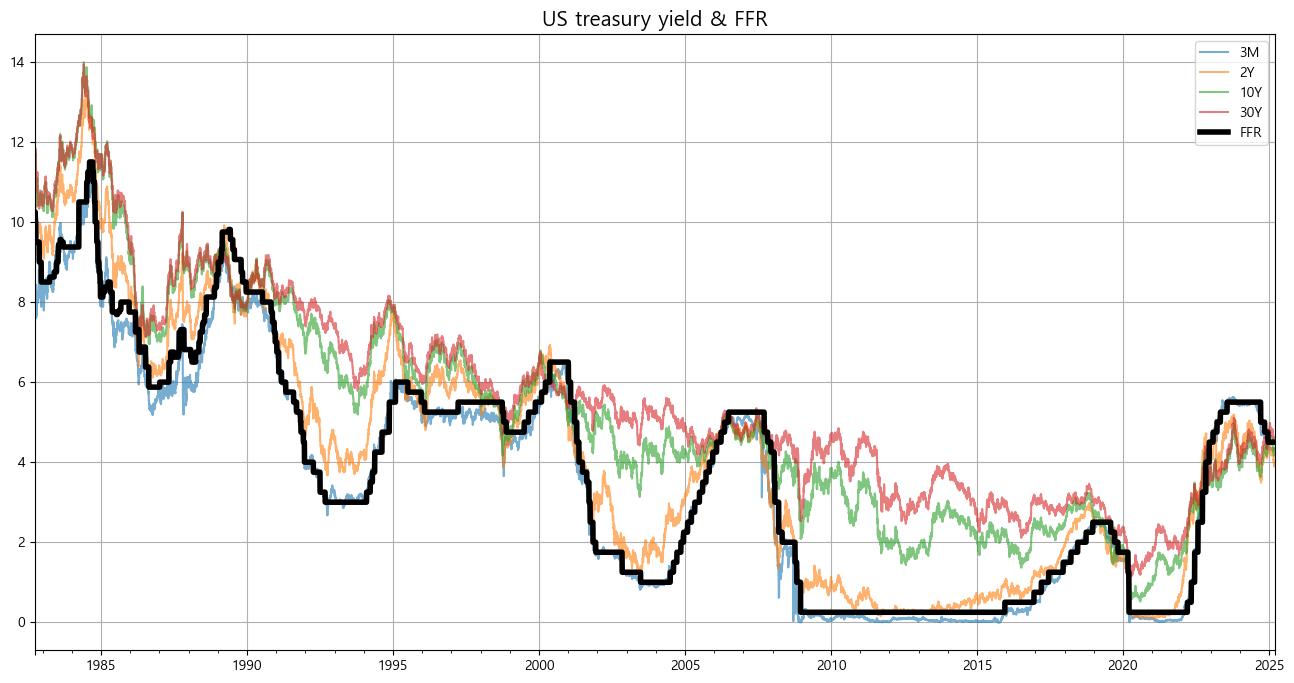

In [99]:
# 미국채(3개월), 미국채(2년), 미국채(10년), 미국채(30년), FFR plot chart

plt.figure(figsize=(16, 8))
df["3M"].plot(label="3M", alpha=0.6)
df["2Y"].plot(label="2Y", alpha=0.6)
df["10Y"].plot(label="10Y", alpha=0.6)
df["30Y"].plot(label="30Y", alpha=0.6)
df["FFR"].plot(label="FFR", linewidth=4, color="black")
plt.title("US treasury yield & FFR", size=15)
plt.legend()
plt.grid()
plt.show()

In [46]:
!pip install finance-datareader


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import FinanceDataReader as fdr

df = fdr.DataReader('CL=F')
df

AttributeError: module 'lib' has no attribute 'X509_V_FLAG_NOTIFY_POLICY'